# Importing Libraries


In [1]:
# Install all necessary libraries


import pandas as pd
import numpy as np
import os
import pandas as pd
import warnings
import sys
from transformers import pipeline

pd.set_option('display.max_colwidth', None)
warnings.filterwarnings("ignore")

# Processing the Data


In [2]:
df = pd.read_csv("/Users/aryan/Actual-Coding/CDAC/content/netflix_titles.csv")
df.head(2)

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,NaN,United States,"September 25, 2021",2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmmaker Kirsten Johnson stages his death in inventive and comical ways to help them both face the inevitable."
1,s2,TV Show,Blood & Water,NaN,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thabang Molaba, Dillon Windvogel, Natasha Thahane, Arno Greeff, Xolile Tshabalala, Getmore Sithole, Cindy Mahlangu, Ryle De Morny, Greteli Fincham, Sello Maake Ka-Ncube, Odwa Gwanya, Mekaila Mathys, Sandi Schultz, Duane Williams, Shamilla Miller, Patrick Mofokeng",South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town teen sets out to prove whether a private-school swimming star is her sister who was abducted at birth."


In [3]:
# Select the 2 columns we need
df = df[['listed_in', 'description']]
# Split the text and get the length thereafter
df['text_length'] = df['description'].str.split().str.len()
# Sort the new dataframe by the text length
df2 = df.sort_values(by = ['text_length'], ascending = False)
df2.head()

,listed_in,description,text_length
4948,"Dramas, International Movies","An Indian village is abuzz with news that a major movie star is coming to town – even more so because the town barber went to school with him. But as the day of the actor's visit approaches, the humble barber begins to worry he won't be recognized.",48
6221,Children & Family Movies,"Half-dog, half-wolf Balto (voiced by Maurice LaMarche) and his wife proudly put their pups up for adoption to humans, but when nobody takes daughter Aleu because she looks too much like a wolf, she runs away to search for her place in the world.",44
215,"Action & Adventure, Dramas, International Movies","Based on a true story, this action film follows an incident that stunned a nation in the early 1990s. In Mumbai, India, the notorious gangster Maya holds off veteran cop Khan and a force of more than 200 policemen in a six-hour bloody gunfight.",44
593,"Children & Family Movies, Comedies","When a snow day shuts down the whole town, the Wheeler family cuts loose. Hal makes a play for the most popular girl in his school, 10-year-old Natalie takes on the dreaded snowplow man, and Dad gets into a showdown with a rival meteorologist.",44
5990,"Action & Adventure, International Movies","In the age of the Ming Dynasty, Quinglong is the best of the Jinyiwei, an elite assassin squad made up of highly trained former street urchins. When evil eunuch Jia unseats the emperor, Quinglong is called to action but is quickly betrayed.",42


In [4]:
# Create a new DF that has only products with more than text length of 40
df2 = df2[df2['text_length']>35]
# Reset the index of the new DF
df2 = df2.reset_index(drop = True)
df2

,listed_in,description,text_length
0,"Dramas, International Movies","An Indian village is abuzz with news that a major movie star is coming to town – even more so because the town barber went to school with him. But as the day of the actor's visit approaches, the humble barber begins to worry he won't be recognized.",48
1,Children & Family Movies,"Half-dog, half-wolf Balto (voiced by Maurice LaMarche) and his wife proudly put their pups up for adoption to humans, but when nobody takes daughter Aleu because she looks too much like a wolf, she runs away to search for her place in the world.",44
2,"Action & Adventure, Dramas, International Movies","Based on a true story, this action film follows an incident that stunned a nation in the early 1990s. In Mumbai, India, the notorious gangster Maya holds off veteran cop Khan and a force of more than 200 policemen in a six-hour bloody gunfight.",44
3,"Children & Family Movies, Comedies","When a snow day shuts down the whole town, the Wheeler family cuts loose. Hal makes a play for the most popular girl in his school, 10-year-old Natalie takes on the dreaded snowplow man, and Dad gets into a showdown with a rival meteorologist.",44
4,"Action & Adventure, International Movies","In the age of the Ming Dynasty, Quinglong is the best of the Jinyiwei, an elite assassin squad made up of highly trained former street urchins. When evil eunuch Jia unseats the emperor, Quinglong is called to action but is quickly betrayed.",42
5,"Action & Adventure, International Movies","Leader of the Ten Kwangtung Tigers, Tieh Chiao-san works with his kung fu students to protect his village from crime. But when an opium dealer starts to ruin the town, Tieh Chiao-san struggles to fight back, thanks to his growing opium addiction.",42
6,Dramas,"After one of his high school students attacks him, dedicated teacher Trevor Garfield grows weary of the gang warfare in the New York City school system and moves to California to teach there, thinking it must be a less hostile environment.",41
7,"Action & Adventure, Anime Features, Sci-Fi & Fantasy","When a group of vicious Sinners plots to escape from this eternal prison in Hell, they discover that Substitute Soul Reaper Ichigo is the key to their freedom. The Sinners launch an attack and in the process kidnap Ichigo's younger sister.",41
8,"Action & Adventure, Comedies, Dramas","Paul Newman proves he's still got prodigious acting chops, playing an aging bank robber who may have one last job in him. Faking a stroke, the incarcerated Newman is transferred to a nursing home and the care of a skeptical nurse.",41
9,"Dramas, Independent Movies, International Movies","The lives of a middle-aged soap opera addict, an ambitious career woman, a fervent activist and nine others from different walks of Indian life intersect in Mumbai. But this vibrant melting pot threatens to bubble over with bias and bigotry.",40


In [5]:
all_categories=",".join([cat for cat in df2['listed_in']])

unique_categories=set(all_categories.split(","))
unique_categories
print("Number of Unique Categories ",len(unique_categories), unique_categories)

Number of Unique Categories  16 {' Comedies', ' Independent Movies', ' International Movies', 'Children & Family Movies', 'Action & Adventure', ' Anime Features', 'Classic Movies', 'Horror Movies', ' Thrillers', ' Sci-Fi & Fantasy', ' Classic Movies', 'Dramas', ' Romantic Movies', ' Dramas', 'Comedies', ' Cult Movies'}


In [6]:
def isCategory(aspectCategory,category):
    if category in aspectCategory:
        return 1
    else:
        return 0

In [7]:
for cat in unique_categories:
    df2[cat]= df2['listed_in'].apply(lambda x:isCategory(x,cat))

df2.head()

,listed_in,description,text_length,Comedies,Independent Movies,International Movies,Children & Family Movies,Action & Adventure,Anime Features,Classic Movies,Horror Movies,Thrillers,Sci-Fi & Fantasy,Classic Movies,Dramas,Romantic Movies,Dramas,Comedies,Cult Movies
0,"Dramas, International Movies","An Indian village is abuzz with news that a major movie star is coming to town – even more so because the town barber went to school with him. But as the day of the actor's visit approaches, the humble barber begins to worry he won't be recognized.",48,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0
1,Children & Family Movies,"Half-dog, half-wolf Balto (voiced by Maurice LaMarche) and his wife proudly put their pups up for adoption to humans, but when nobody takes daughter Aleu because she looks too much like a wolf, she runs away to search for her place in the world.",44,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0
2,"Action & Adventure, Dramas, International Movies","Based on a true story, this action film follows an incident that stunned a nation in the early 1990s. In Mumbai, India, the notorious gangster Maya holds off veteran cop Khan and a force of more than 200 policemen in a six-hour bloody gunfight.",44,0,0,1,0,1,0,0,0,0,0,0,1,0,1,0,0
3,"Children & Family Movies, Comedies","When a snow day shuts down the whole town, the Wheeler family cuts loose. Hal makes a play for the most popular girl in his school, 10-year-old Natalie takes on the dreaded snowplow man, and Dad gets into a showdown with a rival meteorologist.",44,1,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0
4,"Action & Adventure, International Movies","In the age of the Ming Dynasty, Quinglong is the best of the Jinyiwei, an elite assassin squad made up of highly trained former street urchins. When evil eunuch Jia unseats the emperor, Quinglong is called to action but is quickly betrayed.",42,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0


# Code Implementation

In [8]:
# Initializing Zero-Shot Classifier
classifier = pipeline("zero-shot-classification", model="roberta-large-mnli")

Some weights of the model checkpoint at roberta-large-mnli were not used when initializing RobertaForSequenceClassification: ['roberta.pooler.dense.bias', 'roberta.pooler.dense.weight']
- This IS expected if you are initializing RobertaForSequenceClassification from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing RobertaForSequenceClassification from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).


## Predict on whole dataset

In [9]:
zero_shot_classes=list(unique_categories)


In [10]:
from tqdm.notebook import tqdm_notebook

tqdm_notebook.pandas()

df2['zero_shot_output']=df2['description'].progress_apply(lambda x:classifier(x,zero_shot_classes,
                            multi_label=True,hypothesis_template="Based on a true story{}"))

  0%|          | 0/26 [00:00<?, ?it/s]

In [11]:
df2.to_csv("Netflix_Zero_Shot_Prediction.csv",index=False)

# Making Predictions

In [12]:
def getLabelScore(zero_shot_output):
    labels=zero_shot_output['labels']
    scores=zero_shot_output['scores']
    num_labels=len(labels)
    score_dict={label:scores[idx] for idx,label in enumerate(labels)}
    return score_dict

def predictedScore(zero_shot_label_score,label):
    return zero_shot_label_score[label]

def is_predicted(zero_shot_label_score,label, threshold=0.5):
    if zero_shot_label_score[label]>=threshold:
        return 1
    else:
        return 0

In [13]:
import ast
#data['zero_shot_output']=data['zero_shot_output'].apply(lambda x:ast.literal_eval(x))
df2['zero_shot_label_score'] =df2['zero_shot_output'].apply(lambda x:getLabelScore(x))

In [14]:
for cat in zero_shot_classes:
    df2[cat+"_pred_score"]=df2['zero_shot_label_score'].apply(lambda x:predictedScore(x,cat))

## AUC-ROC curve

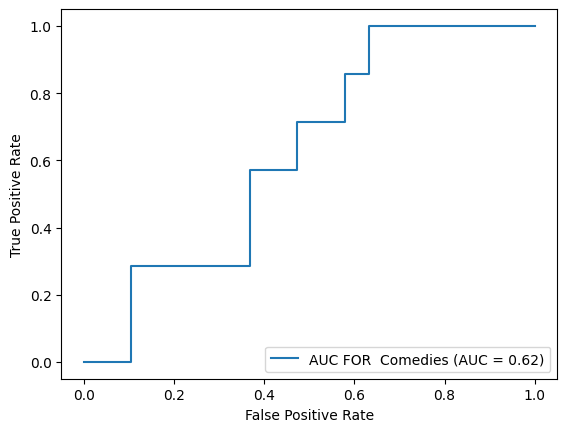

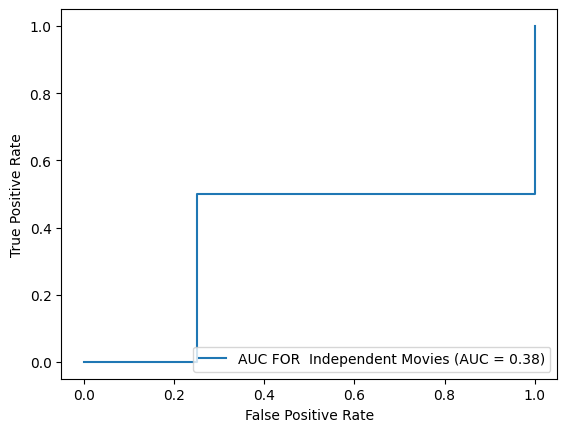

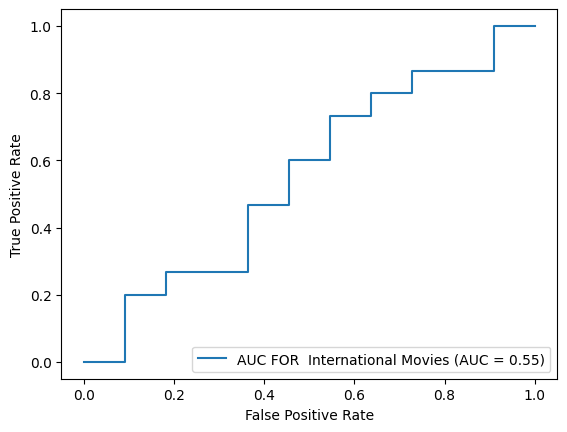

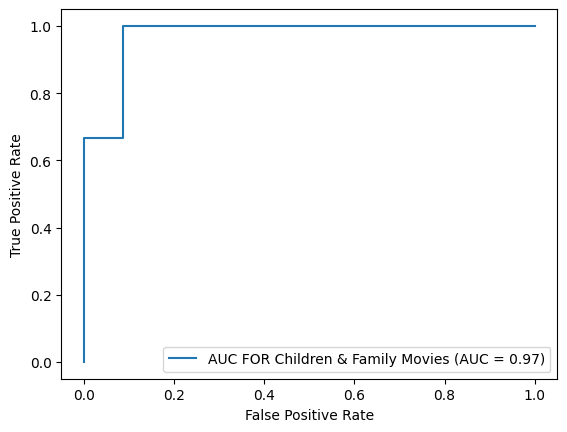

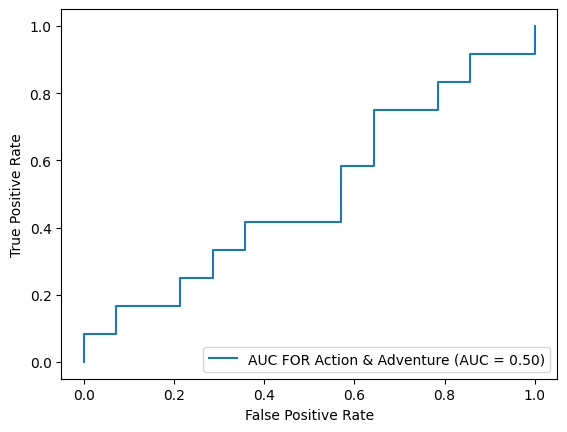

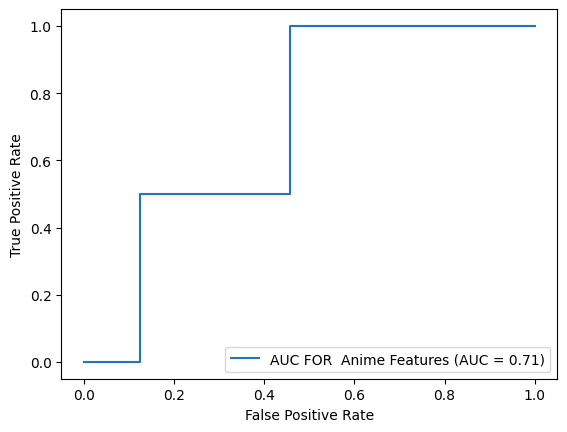

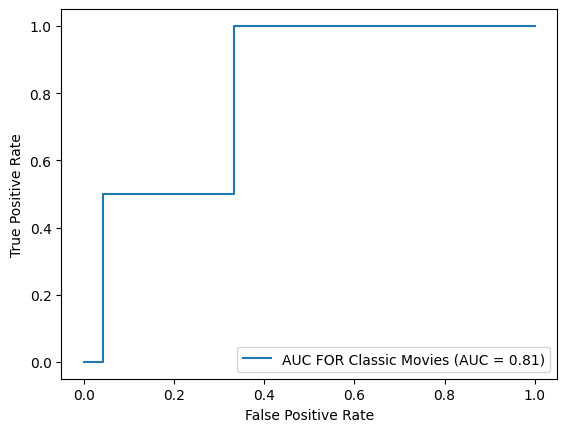

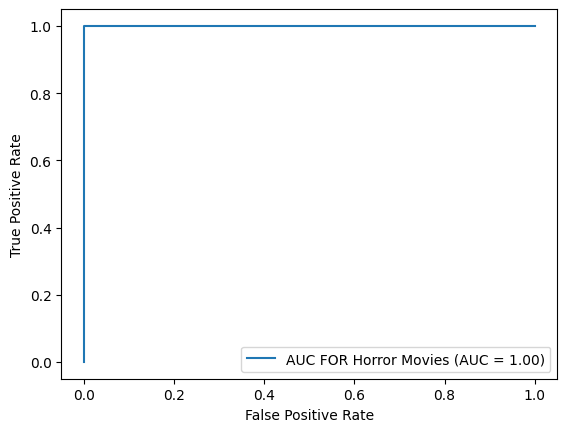

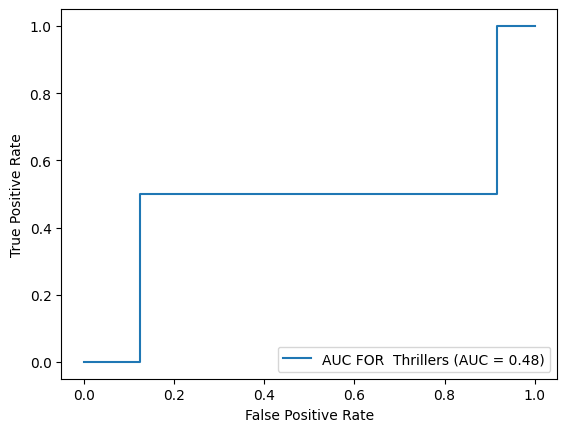

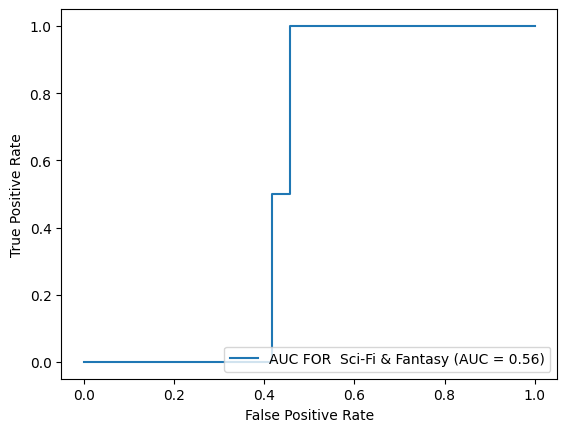

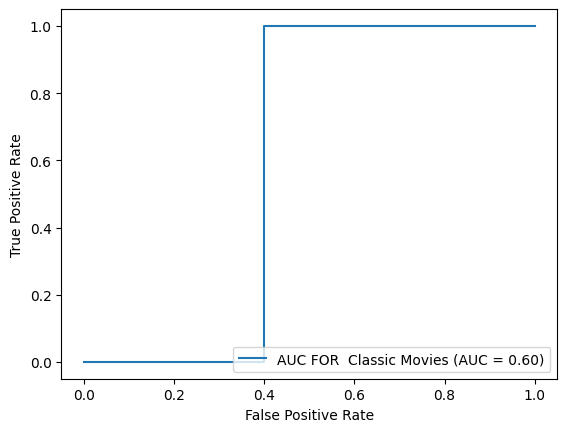

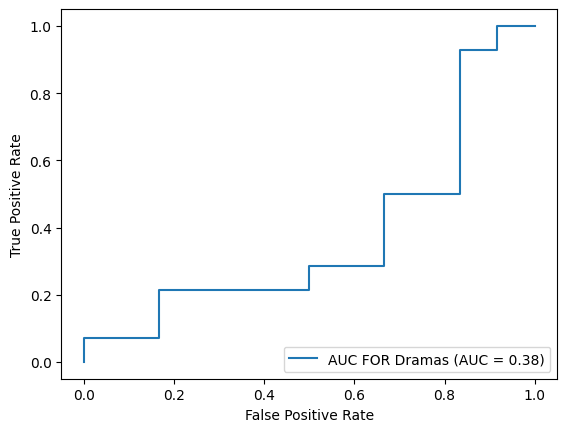

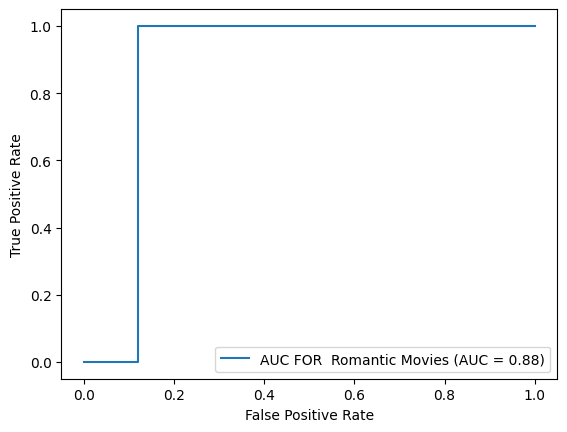

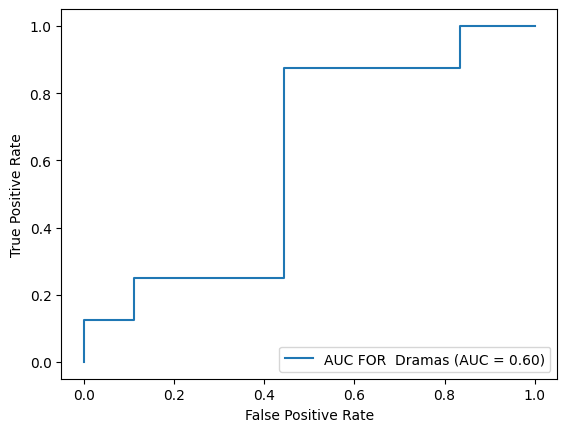

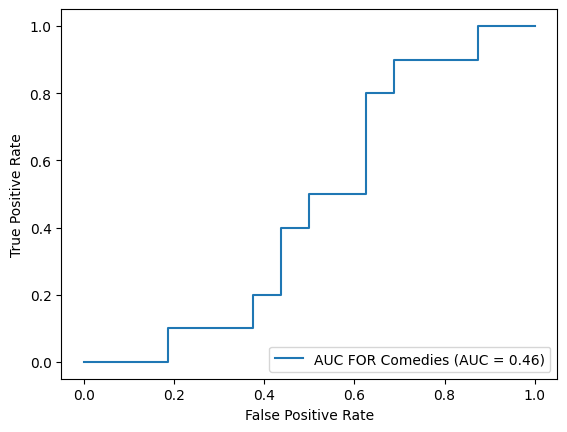

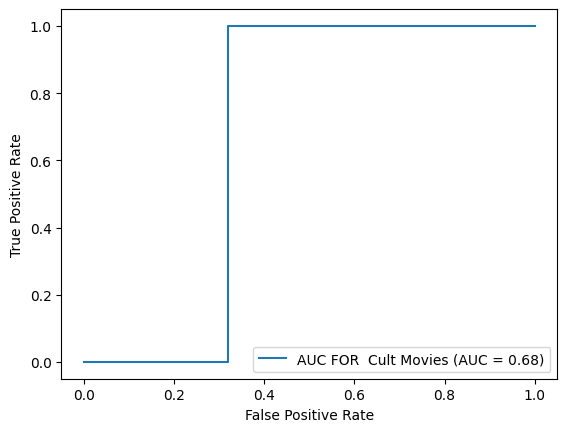

In [15]:
from sklearn.metrics import roc_curve,auc,RocCurveDisplay
for cat in unique_categories:
    fpr, tpr, thresholds = roc_curve(df2[cat], df2[cat+"_pred_score"])
    roc_auc = auc(fpr, tpr)
    display = RocCurveDisplay(fpr=fpr, tpr=tpr, roc_auc=roc_auc,estimator_name='AUC FOR '+cat)
    display.plot()

In [16]:
threshold={}
for cat in unique_categories:
    fpr, tpr, thresholds = roc_curve(df2[cat], df2[cat+"_pred_score"])
    gmean = np.sqrt(tpr * (1 - fpr))
    print("Category "+cat)
    # Find the optimal threshold
    index = np.argmax(gmean)
    thresholdOpt = round(thresholds[index], ndigits = 4)
    gmeanOpt = round(gmean[index], ndigits = 4)
    fprOpt = round(fpr[index], ndigits = 4)
    tprOpt = round(tpr[index], ndigits = 4)
    print('Best Threshold: {} with G-Mean: {}'.format(thresholdOpt, gmeanOpt))
    threshold[cat]=thresholdOpt
    print('FPR: {}, TPR: {}'.format(fprOpt, tprOpt))

Category  Comedies
Best Threshold: 0.0703 with G-Mean: 0.6131
FPR: 0.4737, TPR: 0.7143
Category  Independent Movies
Best Threshold: 0.7946 with G-Mean: 0.6124
FPR: 0.25, TPR: 0.5
Category  International Movies
Best Threshold: 0.2269 with G-Mean: 0.5774
FPR: 0.5455, TPR: 0.7333
Category Children & Family Movies
Best Threshold: 0.8801 with G-Mean: 0.9555
FPR: 0.087, TPR: 1.0
Category Action & Adventure
Best Threshold: 0.4977 with G-Mean: 0.5175
FPR: 0.3571, TPR: 0.4167
Category  Anime Features
Best Threshold: 0.3799 with G-Mean: 0.736
FPR: 0.4583, TPR: 1.0
Category Classic Movies
Best Threshold: 0.4288 with G-Mean: 0.8165
FPR: 0.3333, TPR: 1.0
Category Horror Movies
Best Threshold: 0.9286 with G-Mean: 1.0
FPR: 0.0, TPR: 1.0
Category  Thrillers
Best Threshold: 0.5483 with G-Mean: 0.6614
FPR: 0.125, TPR: 0.5
Category  Sci-Fi & Fantasy
Best Threshold: 0.1414 with G-Mean: 0.736
FPR: 0.4583, TPR: 1.0
Category  Classic Movies
Best Threshold: 0.3759 with G-Mean: 0.7746
FPR: 0.4, TPR: 1.0
Catego

In [17]:
## Setting Threshold of 0.7 and getting the predictions for the classes as 1 or 0
for cat in unique_categories:
    df2[cat+"_pred"]=df2['zero_shot_label_score'].apply(lambda x:is_predicted(x,cat,threshold=0.7))

# <center>Evaluation</center>

## Hamming Loss

### The Hamming loss is the fraction of labels that are incorrectly predicted.

In [18]:
Y=np.array(df2[zero_shot_classes])
Y_pred=np.array(df2[[cat+"_pred" for cat in zero_shot_classes]])

In [19]:
from sklearn.metrics import hamming_loss
print("Hamming Loss across all categories is ")
print(hamming_loss(Y, Y_pred))

Hamming Loss across all categories is 
0.27163461538461536


In [20]:
df2.to_csv("Netflix_Zero_Shot_Prediction.csv",index=False)

In [21]:
from sklearn.metrics import accuracy_score
accuracy_score(df2[cat], df2[cat+"_pred"])

0.8461538461538461

In [22]:
from sklearn.metrics import classification_report
report = classification_report(df2[cat], df2[cat+"_pred"])
print("Classification Report")
print(report)

Classification Report
              precision    recall  f1-score   support

           0       0.96      0.88      0.92        25
           1       0.00      0.00      0.00         1

    accuracy                           0.85        26
   macro avg       0.48      0.44      0.46        26
weighted avg       0.92      0.85      0.88        26

